<a href="https://colab.research.google.com/github/swethamanchukonda/umbc_data690_fall2024/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 10 - Mini Project

Comparing the economy and wealth of G7 countries and BRICS countries.

Use http://g7brics.streamlit.app as the reference.

Make sure your check your calculation, aggregation, and visualization with the reference site for correctness.

For visualization, pay attention to details - color, label, information display.

#Step 1 - Import Python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Step 2 - Load the input dataset

Download the individaul countries data from the reference site and upload it to your GitHub folder. Load the dataset directly from your GitHub.

In [8]:
url = "https://raw.githubusercontent.com/swethamanchukonda/umbc_data690_fall2024/main/2024-11-20T17-16_export.csv"

# Load the dataset
data = pd.read_csv(url)


#Step 3 - Explore the input dataset

Display number of rows and columns
Dispaly at first 5 rows, last 5 rows, and random 5 rows.
Display information about the dataset
For all numerical variables, display their summary statistics
For all categorical variables, display their number of categories and most frequent category
Find out how many countries each region has.
Display all countries that are Latin American & Caribbean.
Find out how many countries each income level has.
Display all countries that are of high income.

In [9]:
# Display number of rows and columns
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

# Display first, last, and random 5 rows
print(data.head())
print(data.tail())
print(data.sample(5, random_state=42))

# Display dataset information
data.info()

# Summary statistics for numerical variables
print(data.describe())

# Summary statistics for categorical variables
categorical_summary = data.select_dtypes(include=['object']).describe()
print(categorical_summary)

# Number of countries in each region
if 'Region' in data.columns:
    region_counts = data['Region'].value_counts()
    print(region_counts)

# Countries in Latin America & Caribbean
if 'Region' in data.columns:
    latin_america = data[data['Region'] == 'Latin America & Caribbean']
    print(latin_america)

# Number of countries in each income level
if 'Income Group' in data.columns:
    income_counts = data['Income Group'].value_counts()
    print(income_counts)

# High-income countries
if 'Income Group' in data.columns:
    high_income_countries = data[data['Income Group'] == 'High income']
    print(high_income_countries)


Rows: 5208, Columns: 17
   Unnamed: 0  Year Country Code Country Name                      Region  \
0           0  2000          ABW        Aruba  Latin America & Caribbean    
1           1  2000          AFG  Afghanistan                  South Asia   
2           2  2000          AGO       Angola         Sub-Saharan Africa    
3           3  2000          ALB      Albania       Europe & Central Asia   
4           4  2000          AND      Andorra       Europe & Central Asia   

          Income Group    Lending Type  Military Expenditure ($Millions)  \
0          High income  Not classified                               NaN   
1           Low income             IDA                               NaN   
2  Lower middle income            IBRD                        583.621334   
3  Upper middle income            IBRD                         45.362503   
4          High income  Not classified                               NaN   

   Military Expenditure (% of GDP)  GDP ($Billions)  GDP

#Step 4 - Categorize Each Country

Create a new column "Group". If a country is one of the seven G7 countried, the value of "Group" would be "G7", if a country of one of the five BRICS countries, the value of "Group" would be "BRICS". Otherwise, the value of "Group" would be "REST of WORLD".

In [10]:
# Define G7 and BRICS countries
g7_countries = ['United States', 'Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom']
brics_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa']

# Categorize countries
data['Group'] = data['Country Name'].apply(
    lambda x: 'G7' if x in g7_countries else ('BRICS' if x in brics_countries else 'REST of WORLD')
)


#Step 5 - Aggregate Data

Aggregate the following columns at the "Group" level for each year:

For GDP, using "sum" for aggregation.
For GDP Per Capita, use "mean" for aggregation.
Check your calculation with the reference site.

In [11]:
# Aggregate GDP and GDP per Capita
grouped_data = data.groupby(['Year', 'Group']).agg({
    'GDP ($Billions)': 'sum',
    'GDP Per Capita ($)': 'mean'
}).reset_index()
print(grouped_data)


    Year          Group  GDP ($Billions)  GDP Per Capita ($)
0   2000          BRICS      2486.928163         2092.467207
1   2000             G7     22089.917915        27757.147971
2   2000  REST of WORLD      8901.873408         7547.718130
3   2001          BRICS      2520.254577         1878.182566
4   2001             G7     21836.921489        27121.012840
..   ...            ...              ...                 ...
67  2022             G7     44179.375717        48144.368028
68  2022  REST of WORLD     32131.733042        19694.284580
69  2023          BRICS     23896.148162         7848.922990
70  2023             G7     46795.834427        50478.231453
71  2023  REST of WORLD     33049.763790        16319.230049

[72 rows x 4 columns]


#Step 6 - Calculate Percentage Share of GDP

For each year, calculate the percentage share of each group's GDP. Check your calculation with the reference site.

In [12]:
# Calculate percentage share of GDP
total_gdp = grouped_data.groupby('Year')['GDP ($Billions)'].transform('sum')
grouped_data['GDP Percentage Share'] = (grouped_data['GDP ($Billions)'] / total_gdp) * 100
print(grouped_data)


    Year          Group  GDP ($Billions)  GDP Per Capita ($)  \
0   2000          BRICS      2486.928163         2092.467207   
1   2000             G7     22089.917915        27757.147971   
2   2000  REST of WORLD      8901.873408         7547.718130   
3   2001          BRICS      2520.254577         1878.182566   
4   2001             G7     21836.921489        27121.012840   
..   ...            ...              ...                 ...   
67  2022             G7     44179.375717        48144.368028   
68  2022  REST of WORLD     32131.733042        19694.284580   
69  2023          BRICS     23896.148162         7848.922990   
70  2023             G7     46795.834427        50478.231453   
71  2023  REST of WORLD     33049.763790        16319.230049   

    GDP Percentage Share  
0               7.428385  
1              65.981968  
2              26.589647  
3               7.568731  
4              65.579800  
..                   ...  
67             44.222025  
68             

#Step 7 - Plot the GDP Percentage Share Over Time

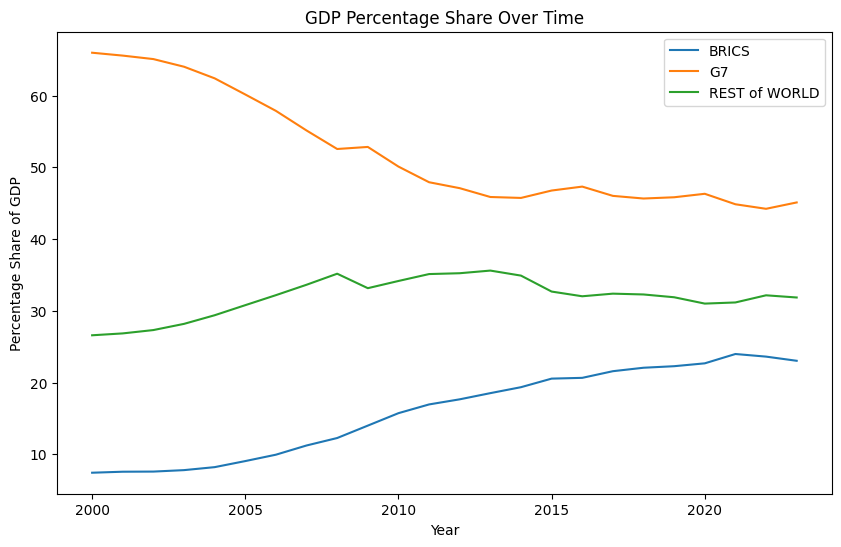

In [13]:
plt.figure(figsize=(10, 6))
for group in grouped_data['Group'].unique():
    group_data = grouped_data[grouped_data['Group'] == group]
    plt.plot(group_data['Year'], group_data['GDP Percentage Share'], label=group)

plt.title('GDP Percentage Share Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage Share of GDP')
plt.legend()
plt.show()


#Step 8 - Plot the Total GDP Over Time

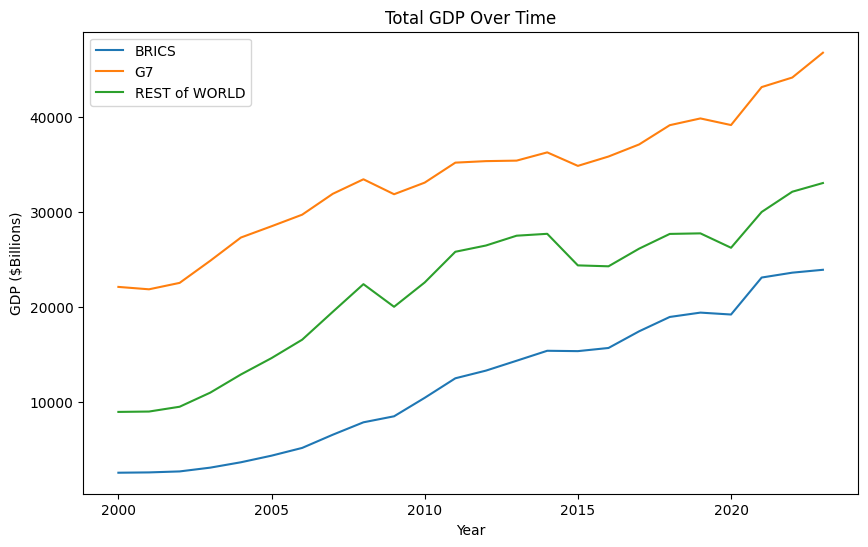

In [14]:
plt.figure(figsize=(10, 6))
for group in grouped_data['Group'].unique():
    group_data = grouped_data[grouped_data['Group'] == group]
    plt.plot(group_data['Year'], group_data['GDP ($Billions)'], label=group)

plt.title('Total GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP ($Billions)')
plt.legend()
plt.show()


#Step 9 - Plot the 2023 GDP Pie Chart

Each group is a slice of a pie. Make sure the following information is displayed for each slice:

Group Name
GDP Percentage Share
GDP Total


In [15]:
data_2023 = grouped_data[grouped_data['Year'] == 2023]

fig = px.pie(
    data_2023,
    values='GDP Percentage Share',
    names='Group',
    title='2023 GDP Percentage Share',
    labels={'Group': 'Group Name', 'GDP Percentage Share': 'Percentage'},
)
fig.show()


#Step 10 - Plot the 2023 GDP Pie Charts

One pie chart for G7 and one pie chart for BRICK. Each country is a slice of a pie. Make sure the following information is displayed for each slice:

Country Name
GDP Percentage Share
GDP Total

In [16]:
g7_2023 = data[(data['Year'] == 2023) & (data['Group'] == 'G7')]
brics_2023 = data[(data['Year'] == 2023) & (data['Group'] == 'BRICS')]

fig_g7 = px.pie(
    g7_2023,
    values='GDP ($Billions)',
    names='Country Name',
    title='2023 G7 GDP',
)
fig_brics = px.pie(
    brics_2023,
    values='GDP ($Billions)',
    names='Country Name',
    title='2023 BRICS GDP',
)
fig_g7.show()
fig_brics.show()


#Step 11 - Plot the 2023 GDP Sun Burst Chart

Showing the hierarchy of Group and Country.

In [17]:
fig = px.sunburst(
    data[data['Year'] == 2023],
    path=['Group', 'Country Name'],
    values='GDP ($Billions)',
    title='2023 GDP Sunburst Chart',
)
fig.show()


#Step 12 - Plot the 2023 GDP Tree Map Chart

Showing the hierarchy of Group and Country.

In [18]:
fig = px.treemap(
    data[data['Year'] == 2023],
    path=['Group', 'Country Name'],
    values='GDP ($Billions)',
    title='2023 GDP Tree Map',
)
fig.show()

#Step 13 - Plot the Historic Trend of GDP Per Capita

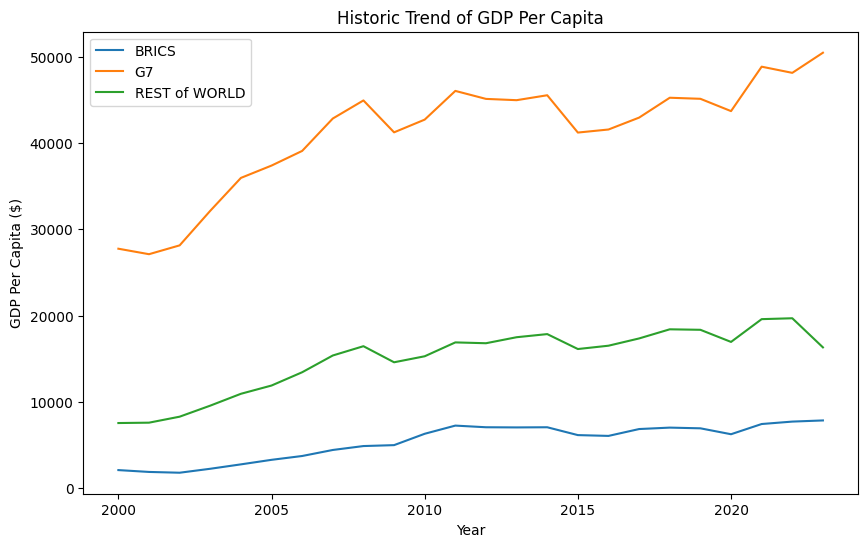

In [19]:
plt.figure(figsize=(10, 6))
for group in grouped_data['Group'].unique():
    group_data = grouped_data[grouped_data['Group'] == group]
    plt.plot(group_data['Year'], group_data['GDP Per Capita ($)'], label=group)

plt.title('Historic Trend of GDP Per Capita')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita ($)')
plt.legend()
plt.show()


#Step 14 - Plot the 2023 GDP Per Capita Bar Chart

Each group is a bar.



In [20]:
fig = px.bar(
    grouped_data[grouped_data['Year'] == 2023],
    x='Group',
    y='GDP Per Capita ($)',
    title='2023 GDP Per Capita by Group',
    labels={'Group': 'Group', 'GDP Per Capita ($)': 'GDP Per Capita ($)'},
)
fig.show()


#Step 15 - Plot the 2023 GDP Per Capita Bar Chart of G7 and BRICS countries

Each country is a bar. Differentiate group by color.

In [21]:
g7_brics_2023 = data[(data['Year'] == 2023) & (data['Group'].isin(['G7', 'BRICS']))]

fig = px.bar(
    g7_brics_2023,
    x='Country Name',
    y='GDP Per Capita ($)',
    color='Group',
    title='2023 GDP Per Capita for G7 and BRICS',
)
fig.show()


#Step 16 - Create a Choropleth

To show G7 countries and BRICS countries and use color code to differentiate the two broups.

In [22]:
fig = px.choropleth(
    data,
    locations='Country Code',
    color='Group',
    hover_name='Country Name',
    title='G7 and BRICS Countries (2023)',
)
fig.show()
